In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [2]:
import sys, os
print(os.listdir())

['.git', '001_amp_maps_2890.csv', '002_amp_maps_3422.csv', '003_amp_maps_2918.csv', '004_amp_maps_3450.csv', '005_amp_maps_2946.csv', '006_amp_maps_3478.csv', '008_P_amp_maps_2265P01.csv', 'Bad_Channels.ipynb', 'Bad_Channels_Logistic_Regression.ipynb', 'decode_listing_features_001.csv', 'decode_listing_features_002.csv', 'decode_listing_features_003.csv', 'decode_listing_features_003_old.csv', 'decode_listing_features_004.csv', 'decode_listing_features_005.csv', 'decode_listing_features_006.csv', 'decode_listing_features_010_old.csv', 'README.md', 'RMS.png']


In [4]:
stats1=pd.read_csv('decode_listing_features_001.csv')
stats1['SEQ']=1
stats1a=pd.read_csv('decode_listing_features_002.csv')
stats1a['SEQ']=2
stats1b=pd.read_csv('decode_listing_features_003.csv')
stats1b['SEQ']=3
stats1c=pd.read_csv('decode_listing_features_004.csv')
stats1c['SEQ']=4
stats1d=pd.read_csv('decode_listing_features_005.csv')
stats1d['SEQ']=5
stats1e=pd.read_csv('decode_listing_features_005.csv')
stats1e['SEQ']=6
stats1=stats1.append(stats1a)
stats1=stats1.append(stats1b)
stats1=stats1.append(stats1c)
stats1=stats1.append(stats1d)
stats1=stats1.append(stats1e)

C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\1877141032.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats1=stats1.append(stats1a)
C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\1877141032.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats1=stats1.append(stats1b)
C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\1877141032.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats1=stats1.append(stats1c)
C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\1877141032.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats1=stats1.append(stats1d)
C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\18771410

In [5]:
stats1.head()

,BAD_CHAN_FLAG,CAP_CUT_ERR,CAP_ERR,CAP_VAL,CHANNEL,DEEP_RMS,DEVICE,LEAK_ERR,LEAK_VAL,MARG_CHAN_FLAG,SENS,SEQ
0,0,0,0,232.691345,1,10.58,4,0,5.0,0,31.66,1
1,0,0,0,228.366440,2,7.28,0,0,5.0,0,31.22,1
2,0,0,0,234.802597,3,6.10,0,0,5.0,0,30.32,1
3,0,0,0,233.590988,4,6.78,0,0,5.0,0,31.26,1
4,0,0,0,228.584885,5,7.02,0,0,5.0,0,31.13,1


In [6]:
stats2=pd.read_csv('001_amp_maps_2890.csv')
stats2['SEQ']=1
#stats2=pd.read_csv('008_P_amp_maps_2265P01.csv')
#stats2['SEQ']=1
#stats2a=pd.read_csv('002_amp_maps_3422.csv')
#stats2a['SEQ']=2
#stats2b=pd.read_csv('003_amp_maps_2918.csv')
#stats2b['SEQ']=3
#stats2c=pd.read_csv('004_amp_maps_3450.csv')
#stats2c['SEQ']=4
#stats2d=pd.read_csv('005_amp_maps_2946.csv')
#stats2d['SEQ']=5
#stats2e=pd.read_csv('006_amp_maps_3478.csv')#
#stats2e['SEQ']=6
#stats2=stats2.append(stats2a)
#stats2=stats2.append(stats2b)
#stats2=stats2.append(stats2c)
#stats2=stats2.append(stats2d)
#stats2=stats2.append(stats2e)

In [7]:
stats2.head()

,SRC_POINT,CHANNEL,WC_RMS,TGT_RMS,DEEP_RMS,FFID,CABLE,CABTR,SEQ
0,5071,1,5.415281,30.081125,12.606074,1001,1,1,1
1,5071,2,6.816298,28.298389,9.360264,1001,1,2,1
2,5071,3,6.319650,25.300581,8.873336,1001,1,3,1
3,5071,4,2.712788,28.077599,7.638037,1001,1,4,1
4,5071,5,4.047064,27.413845,9.036798,1001,1,5,1


In [8]:
std_=stats2.groupby(['SEQ','CHANNEL'])['DEEP_RMS'].agg(np.std)

In [9]:
std_=pd.DataFrame(std_)

In [10]:
std_.sort_values(['SEQ','CHANNEL'],inplace=True)
stats1.sort_values(['SEQ','CHANNEL'],inplace=True)

In [11]:
std_.reset_index(inplace=True)
len(std_)

9072

In [12]:
len(stats1)

54432

In [13]:
std_.head()

,SEQ,CHANNEL,DEEP_RMS
0,1,1,3.725214
1,1,2,2.094594
2,1,3,1.885017
3,1,4,2.093174
4,1,5,2.046160


In [14]:
df1=pd.merge(std_,stats1 , how='left', left_on=['SEQ','CHANNEL'], right_on=['SEQ','CHANNEL'])
df2=df1.copy()

In [15]:
df2.head(10)

,SEQ,CHANNEL,DEEP_RMS_x,BAD_CHAN_FLAG,CAP_CUT_ERR,CAP_ERR,CAP_VAL,DEEP_RMS_y,DEVICE,LEAK_ERR,LEAK_VAL,MARG_CHAN_FLAG,SENS
0,1,1,3.725214,0,0,0,232.691345,10.58,4,0,5.0,0,31.66
1,1,2,2.094594,0,0,0,228.366440,7.28,0,0,5.0,0,31.22
2,1,3,1.885017,0,0,0,234.802597,6.10,0,0,5.0,0,30.32
3,1,4,2.093174,0,0,0,233.590988,6.78,0,0,5.0,0,31.26
4,1,5,2.046160,0,0,0,228.584885,7.02,0,0,5.0,0,31.13
5,1,6,1.960650,0,0,0,230.264236,6.56,0,0,5.0,0,30.82
6,1,7,2.006694,0,0,0,230.004303,6.84,0,0,5.0,0,31.01
7,1,8,2.026388,0,0,0,231.898392,6.79,0,0,5.0,0,31.13
8,1,9,1.988935,0,0,0,230.703339,7.01,0,0,5.0,0,30.98
9,1,10,2.097428,0,0,0,226.584427,7.53,0,0,5.0,0,31.27


In [16]:
a=stats2['TGT_RMS']

In [17]:
df1.head(10)

,SEQ,CHANNEL,DEEP_RMS_x,BAD_CHAN_FLAG,CAP_CUT_ERR,CAP_ERR,CAP_VAL,DEEP_RMS_y,DEVICE,LEAK_ERR,LEAK_VAL,MARG_CHAN_FLAG,SENS
0,1,1,3.725214,0,0,0,232.691345,10.58,4,0,5.0,0,31.66
1,1,2,2.094594,0,0,0,228.366440,7.28,0,0,5.0,0,31.22
2,1,3,1.885017,0,0,0,234.802597,6.10,0,0,5.0,0,30.32
3,1,4,2.093174,0,0,0,233.590988,6.78,0,0,5.0,0,31.26
4,1,5,2.046160,0,0,0,228.584885,7.02,0,0,5.0,0,31.13
5,1,6,1.960650,0,0,0,230.264236,6.56,0,0,5.0,0,30.82
6,1,7,2.006694,0,0,0,230.004303,6.84,0,0,5.0,0,31.01
7,1,8,2.026388,0,0,0,231.898392,6.79,0,0,5.0,0,31.13
8,1,9,1.988935,0,0,0,230.703339,7.01,0,0,5.0,0,30.98
9,1,10,2.097428,0,0,0,226.584427,7.53,0,0,5.0,0,31.27


In [18]:
b=a.to_list()

In [20]:
c= np.reshape(b,(-1,9072))
c=np.transpose(c)

In [21]:
c=np.clip(c,0,100)

In [22]:
%matplotlib inline

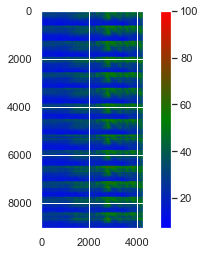

In [23]:
import matplotlib.colors as colly

cmap1= colly.LinearSegmentedColormap.from_list("" , ['blue','green','red'])

im=plt.imshow(c, cmap=cmap1)
plt.colorbar(im)
plt.rcParams["figure.figsize"] = (70,20)
plt.savefig('RMS.png')

plt.show()

In [24]:
df1.head(10)

,SEQ,CHANNEL,DEEP_RMS_x,BAD_CHAN_FLAG,CAP_CUT_ERR,CAP_ERR,CAP_VAL,DEEP_RMS_y,DEVICE,LEAK_ERR,LEAK_VAL,MARG_CHAN_FLAG,SENS
0,1,1,3.725214,0,0,0,232.691345,10.58,4,0,5.0,0,31.66
1,1,2,2.094594,0,0,0,228.366440,7.28,0,0,5.0,0,31.22
2,1,3,1.885017,0,0,0,234.802597,6.10,0,0,5.0,0,30.32
3,1,4,2.093174,0,0,0,233.590988,6.78,0,0,5.0,0,31.26
4,1,5,2.046160,0,0,0,228.584885,7.02,0,0,5.0,0,31.13
5,1,6,1.960650,0,0,0,230.264236,6.56,0,0,5.0,0,30.82
6,1,7,2.006694,0,0,0,230.004303,6.84,0,0,5.0,0,31.01
7,1,8,2.026388,0,0,0,231.898392,6.79,0,0,5.0,0,31.13
8,1,9,1.988935,0,0,0,230.703339,7.01,0,0,5.0,0,30.98
9,1,10,2.097428,0,0,0,226.584427,7.53,0,0,5.0,0,31.27


In [25]:
df1=df1.drop('CAP_CUT_ERR',1)
df1=df1.drop('CAP_ERR',1)
df1=df1.drop('LEAK_ERR',1)
df1=df1.drop('SENS',1)
df1=df1.drop('MARG_CHAN_FLAG',1)

C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\1774694302.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1=df1.drop('CAP_CUT_ERR',1)
C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\1774694302.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1=df1.drop('CAP_ERR',1)
C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\1774694302.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1=df1.drop('LEAK_ERR',1)
C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\1774694302.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1=df1.drop('SENS',1)
C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\1774694302.py:5: FutureWarning

In [26]:
df1.head()

,SEQ,CHANNEL,DEEP_RMS_x,BAD_CHAN_FLAG,CAP_VAL,DEEP_RMS_y,DEVICE,LEAK_VAL
0,1,1,3.725214,0,232.691345,10.58,4,5.0
1,1,2,2.094594,0,228.366440,7.28,0,5.0
2,1,3,1.885017,0,234.802597,6.10,0,5.0
3,1,4,2.093174,0,233.590988,6.78,0,5.0
4,1,5,2.046160,0,228.584885,7.02,0,5.0


In [27]:
pd.to_numeric(df1['BAD_CHAN_FLAG'])
y=pd.DataFrame(df1['BAD_CHAN_FLAG'])
X=df1.drop(['BAD_CHAN_FLAG'],1)

C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\1240260745.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df1.drop(['BAD_CHAN_FLAG'],1)


In [28]:
yy=y.values.tolist()

In [29]:
X2=X.copy()
X2=X2.drop(['CHANNEL','SEQ'],1)

C:\Users\sirproc\AppData\Local\Temp\ipykernel_16856\447026479.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2=X2.drop(['CHANNEL','SEQ'],1)


In [30]:
# Calculate the correlation values
feature_cols = X2.columns
corr_values = X2[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

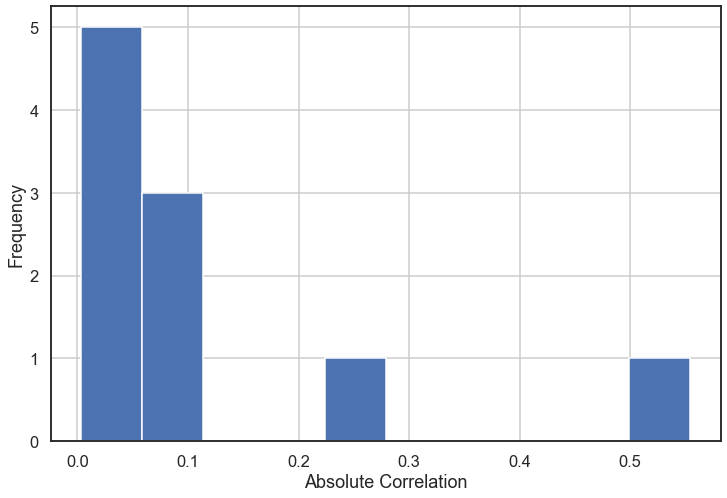

In [31]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=10, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [32]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.2')

,feature1,feature2,correlation,abs_correlation
1,DEEP_RMS_x,DEEP_RMS_y,0.554213,0.554213
7,DEEP_RMS_y,DEVICE,0.253006,0.253006


In [33]:
XX=X2.values.tolist()

In [34]:
XX[0:5]

[[3.725214248963877, 232.691345, 10.58, 4.0, 5.0],
 [2.0945937529968033, 228.36644, 7.28, 0.0, 5.0],
 [1.8850165095194575, 234.802597, 6.1, 0.0, 5.0],
 [2.0931738147193406, 233.590988, 6.78, 0.0, 5.0],
 [2.0461598423613534, 228.584885, 7.02, 0.0, 5.0]]

In [35]:
XX=preprocessing.StandardScaler().fit(XX).transform(XX)

In [36]:
XX[0:5]

array([[ 3.28383591e+00, -9.74047382e-02,  2.43199616e+00,
         2.87776781e+00,  6.34679145e-02],
       [ 5.46978559e-01, -5.63734644e-01,  3.87188179e-01,
        -2.90955285e-01,  6.34679145e-02],
       [ 1.95221041e-01,  1.30239556e-01, -3.43985586e-01,
        -2.90955285e-01,  6.34679145e-02],
       [ 5.44595314e-01, -4.01350614e-04,  7.73687870e-02,
        -2.90955285e-01,  6.34679145e-02],
       [ 4.65686374e-01, -5.40180963e-01,  2.26082095e-01,
        -2.90955285e-01,  6.34679145e-02]])

In [38]:
import statsmodels.api as sm
logit_model=sm.Logit(yy,XX)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.692360
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: -17.434   
Dependent Variable: y                AIC:              12572.1748
Date:               2022-05-28 08:51 BIC:              12607.7396
No. Observations:   9072             Log-Likelihood:   -6281.1   
Df Model:           4                LL-Null:          -340.73   
Df Residuals:       9067             LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.0771      0.0262     2.9456    0.0032     0.0258     0.1284
x2    -0.0451      0.0214    -2.1049    0.0353    -0.0

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.5) #missing some parameters

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\Users\sirproc\Anaconda3\envs\data_science\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [42]:
y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format()) missing params

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

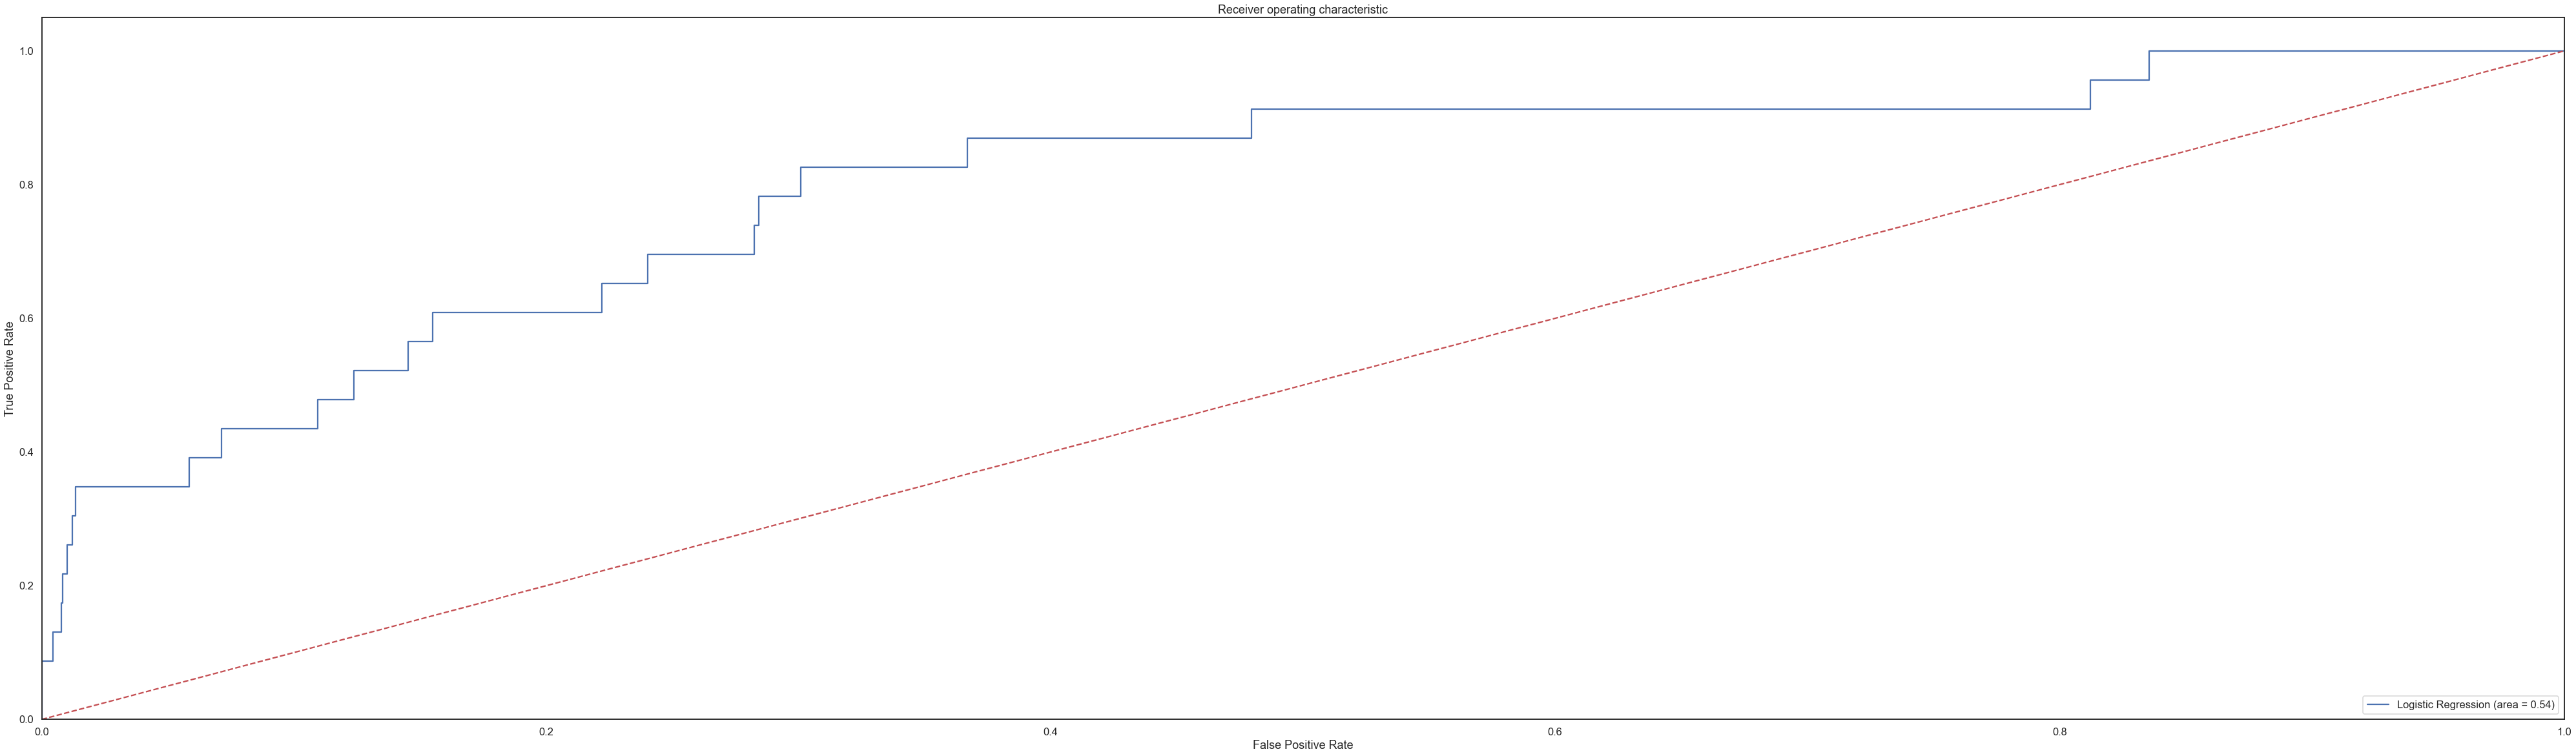

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC.png')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

In [46]:
fd=pd.DataFrame(y_pred)
fd2=pd.DataFrame(y_test)

In [47]:
fd2.head()

,0
0,0
1,0
2,0
3,0
4,0


In [48]:
FD2=fd2.reset_index()
FD2.set_axis(['index','FLAG_ORIG'],axis=1,inplace=True)

In [49]:
merge=FD2.merge(fd,left_index=True, right_index=True)
merge.set_axis(['index','FLAG_ORIG','PREDICT'],axis=1,inplace=True)

In [50]:
merge.head()

,index,FLAG_ORIG,PREDICT
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [51]:
merge['DIFF']=merge['FLAG_ORIG']-merge['PREDICT']

In [52]:
finder=merge['DIFF']!=0
finder

0       False
1       False
2       False
3       False
4       False
        ...  
4531    False
4532    False
4533    False
4534    False
4535    False
Name: DIFF, Length: 4536, dtype: bool

In [54]:
for i,x in merge.iterrows():
    if x['DIFF']!=0:
        print(x)

index        11
FLAG_ORIG     1
PREDICT       0
DIFF          1
Name: 11, dtype: int64
index        258
FLAG_ORIG      1
PREDICT        0
DIFF           1
Name: 258, dtype: int64
index        362
FLAG_ORIG      1
PREDICT        0
DIFF           1
Name: 362, dtype: int64
index        468
FLAG_ORIG      1
PREDICT        0
DIFF           1
Name: 468, dtype: int64
index        569
FLAG_ORIG      1
PREDICT        0
DIFF           1
Name: 569, dtype: int64
index        718
FLAG_ORIG      1
PREDICT        0
DIFF           1
Name: 718, dtype: int64
index        797
FLAG_ORIG      1
PREDICT        0
DIFF           1
Name: 797, dtype: int64
index        1094
FLAG_ORIG       0
PREDICT         1
DIFF           -1
Name: 1094, dtype: int64
index        1107
FLAG_ORIG       1
PREDICT         0
DIFF            1
Name: 1107, dtype: int64
index        1325
FLAG_ORIG       1
PREDICT         0
DIFF            1
Name: 1325, dtype: int64
index        1341
FLAG_ORIG       1
PREDICT         0
DIFF            

In [55]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df1, df1, test_size=0.5) #missing params

In [56]:
FD3=y1_test.reset_index()
newtest=pd.merge(FD3,merge)

In [57]:
newtest.head()

,index,SEQ,CHANNEL,DEEP_RMS_x,BAD_CHAN_FLAG,CAP_VAL,DEEP_RMS_y,DEVICE,LEAK_VAL,FLAG_ORIG,PREDICT,DIFF
0,3818,1,3819,0.857687,0,231.147919,3.07,0,5.0,0,0,0
1,4277,1,4278,2.231054,0,234.054321,6.08,0,5.0,0,0,0
2,1106,1,1107,1.557638,0,237.725113,7.11,0,5.0,0,0,0
3,4472,1,4473,0.690153,0,233.176956,3.08,0,5.0,0,0,0
4,3931,1,3932,2.444539,0,237.018509,5.83,0,5.0,0,0,0


In [59]:
for i,x in newtest.iterrows():
    if x['PREDICT']>x['BAD_CHAN_FLAG']:
        print(x)

index            1924.000000
SEQ                 1.000000
CHANNEL          1925.000000
DEEP_RMS_x          0.662546
BAD_CHAN_FLAG       0.000000
CAP_VAL           229.655594
DEEP_RMS_y          3.440000
DEVICE              0.000000
LEAK_VAL            5.000000
FLAG_ORIG           0.000000
PREDICT             1.000000
DIFF               -1.000000
Name: 2131, dtype: float64


In [60]:
# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

c:\Users\sirproc\Anaconda3\envs\data_science\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
from sklearn.linear_model import LogisticRegressionCV
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit() #more params needed

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [62]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [64]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]
for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

NameError: name 'lr_l1' is not defined

In [65]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
metrics = list()
cm = dict()
for lab in coeff_labels:
    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted'
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    # ROC-AUC scores can be calculated by binarizing the data
#   auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
#       label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]),
#       average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                                'fscore':fscore, 'accuracy':accuracy},
#                                   auc':auc},
                                name=lab))
metrics = pd.concat(metrics, axis=1)

SyntaxError: invalid syntax (3685462447.py, line 10)

In [66]:
metrics

<module 'sklearn.metrics' from 'c:\\Users\\sirproc\\Anaconda3\\envs\\data_science\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

NameError: name 'cm' is not defined

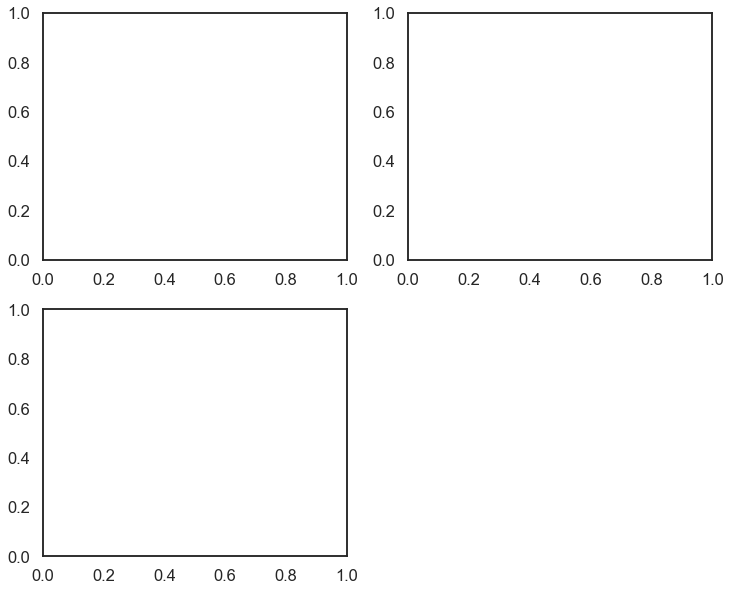

In [68]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)
axList[-1].axis('off')
for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d',cmap=cmap1);
    ax.set(title=lab);
plt.tight_layout()